In [1]:
from base_functions import node, element_linear, element_nonlinear, system

#### linear trusses 

n0  =  node(id= 0 ,coord=[0,0,0],aim_coord=[0,0,0],force=[0,0,0],dofs=[ 0 , 1 ,2],fix=[True,True,True])
n1  =  node(id= 1 ,coord=[1,0,2],aim_coord=[1,0,2],force=[0,0,0],dofs=[ 3,4,5 ],fix=[False,False,False])
n2  =  node(id= 2 ,coord=[2,0,0],aim_coord=[2,0,0],force=[0,0,0],dofs=[ 6,7,8 ],fix=[True,True,True])
n3  =  node(id= 3 ,coord=[0,1,1],aim_coord=[0,1,1],force=[0,0,0],dofs=[ 9,10,11 ],fix=[True,True,True])


mp = {
    "claw": "StVenant",
    "YoungsModulus" : 1000000.0,
    "density" : 1000.0
}

e0 = element_linear(n0 ,n1 , material_parameters=mp, cross_area=0.01)
e1 = element_linear(n2 ,n1 , material_parameters=mp, cross_area=0.01)
e2 = element_linear(n3 ,n1 , material_parameters=mp, cross_area=0.01)

s_l = system(
    [n0,n1,n2,n3],
    [e0,e1,e2],
    gravity_direction=[0.0,1.0,0.0])


#### nonlinear trusses 

n00  =  node(id= 0 ,coord=[0,0,0],aim_coord=[0,0,0],force=[0,0,0],dofs=[ 0 , 1 ,2],fix=[True,True,True])
n01  =  node(id= 1 ,coord=[1,0,2],aim_coord=[1,0,2],force=[0,0,0],dofs=[ 3,4,5 ],fix=[False,False,False])
n02  =  node(id= 2 ,coord=[2,0,0],aim_coord=[2,0,0],force=[0,0,0],dofs=[ 6,7,8 ],fix=[True,True,True])
n03  =  node(id= 3 ,coord=[0,1,1],aim_coord=[0,1,1],force=[0,0,0],dofs=[ 9,10,11 ],fix=[True,True,True])


e00 = element_nonlinear(n00 ,n01 , material_parameters=mp, cross_area=0.01)
e01 = element_nonlinear(n02 ,n01 , material_parameters=mp, cross_area=0.01)
e02 = element_nonlinear(n03 ,n01 , material_parameters=mp, cross_area=0.01)

s_nl = system(
    [n00,n01,n02,n03],
    [e00,e01,e02],
    gravity_direction=[0.0,1.0,0.0])



In [2]:
# solving nonlinear trusses
s_nl.solve_inverse_problem()

# solving linear trusses
s_l.solve_inverse_problem()

 >> starting to solve inverse problem
disp residual:  4.111569e-01   |   force residual:  3.043154e+02
disp residual:  4.336029e-02   |   force residual:  3.208512e+02
disp residual:  2.003178e-03   |   force residual:  8.995675e+00
disp residual:  3.340333e-06   |   force residual:  3.702616e-03
disp residual:  2.544743e-12   |   force residual:  1.979934e-08
disp residual:  3.816003e-16   |   force residual:  1.548396e-12
 >> inverse problem solved
 >> starting to solve inverse problem
disp residual:  4.111569e-01   |   force residual:  3.043154e+02
disp residual:  1.020446e-01   |   force residual:  8.389677e+02
disp residual:  2.480554e-02   |   force residual:  3.402456e+01
disp residual:  6.592825e-04   |   force residual:  3.004466e+00
disp residual:  9.114033e-07   |   force residual:  2.055607e-03
disp residual:  1.196956e-12   |   force residual:  4.167301e-09
disp residual:  2.330675e-16   |   force residual:  9.327345e-13
 >> inverse problem solved


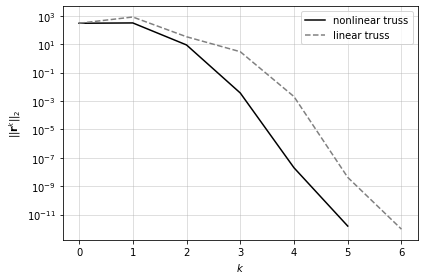

In [3]:
#%matplotlib inline 
s_nl.plot_convergence(label_text="nonlinear truss")
s_l.plot_convergence(label_text="linear truss")
s_l.show_plot()
#s_l.save_plot_pdf("convergence_plot")

/home/klaus/Code/Find_Reference_Truss_3D/base_functions.py:851: RuntimeWarning: invalid value encountered in double_scalars
  ax.quiver(node.x,node.y,node.z,dx*arrow_scale*f[0]/f_max,dx*arrow_scale*f[1]/f_max,dx*arrow_scale*f[2]/f_max,length=1.0)


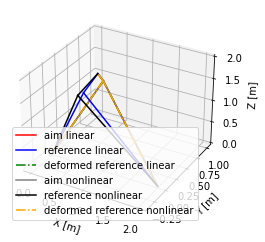

In [4]:
#%matplotlib qt 
fig, ax = s_l.create_plot_figures_3d()
plot_figures = {"fig":fig, "ax":ax}
s_l.plot(["aim","ref","extra"], plot_figures)
s_nl.plot(["aim","ref","extra"], plot_figures)
s_l.show_plot()

In [5]:
print("linear: ", n1.x, n1.y, n1.z)
print("nonlinear: ", n01.x, n01.y, n01.z)

linear:  0.874387790220548 -0.2627503778460067 1.9263479975443771
nonlinear:  0.8431479069299961 -0.3437354017714695 1.9298317925520423
